# **Projekt SF1930 - LCQ Finalist Analysis**

**Syfte:**
Vi analyserar skateboardåkares trick- och run-prestationer och använder statistiska metoder för att modellera deras sannolikhet att kvalificera sig till finalen.

**Huvudsteg:**
- Läser in och normaliserar data.
- Skapar histogram över trickbetyg.
- Skattar sannolikheter för landade trick och höga betyg.
- Visualiserar relationen mellan run 1 och run 2.

---

# **Uppgift 1a: Dataimport och normalisering**

**Vad gör vi här?**
- Läser in `SLS22.csv` och skapar en dataframe.
- Normaliserar betyg till intervallet [0,1] för att underlätta analysen.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Läs in data
file_path = "SLS22.csv"
df = pd.read_csv(file_path)

# Normalisera betygskolumner
betygskolumner = df.columns[6:]
df[betygskolumner] /= 10

# Visa exempel på normaliserad data
print("Exempel på normaliserade betyg:")
print(df.head())

Exempel på normaliserade betyg:
        id      location  month  year        comp  heat  run 1  run 2  \
0   Berger  jacksonville      7  2022  prelim men     1   0.50   0.11   
1     Papa  jacksonville      7  2022  prelim men     1   0.37   0.70   
2  Pudwill  jacksonville      7  2022  prelim men     1   0.20   0.13   
3   Shirai  jacksonville      7  2022  prelim men     1   0.79   0.70   
4     Mota  jacksonville      7  2022  prelim men     1   0.38   0.40   

   trick 1  trick 2  trick 3  trick 4  trick 5  trick 6  
0     0.70      0.0     0.76     0.00      NaN      NaN  
1     0.72      0.0     0.84     0.82      NaN      NaN  
2     0.00      0.0     0.00     0.00      NaN      NaN  
3     0.75      0.0     0.92     0.00      NaN      NaN  
4     0.78      0.0     0.00     0.00      NaN      NaN  


# **Uppgift 1b: Histogram över trickbetyg**

**Vad gör vi här?**
- Visualiserar fördelningen av trickbetyg med histogram.
- Beräknar andelen trick med betyg 0.

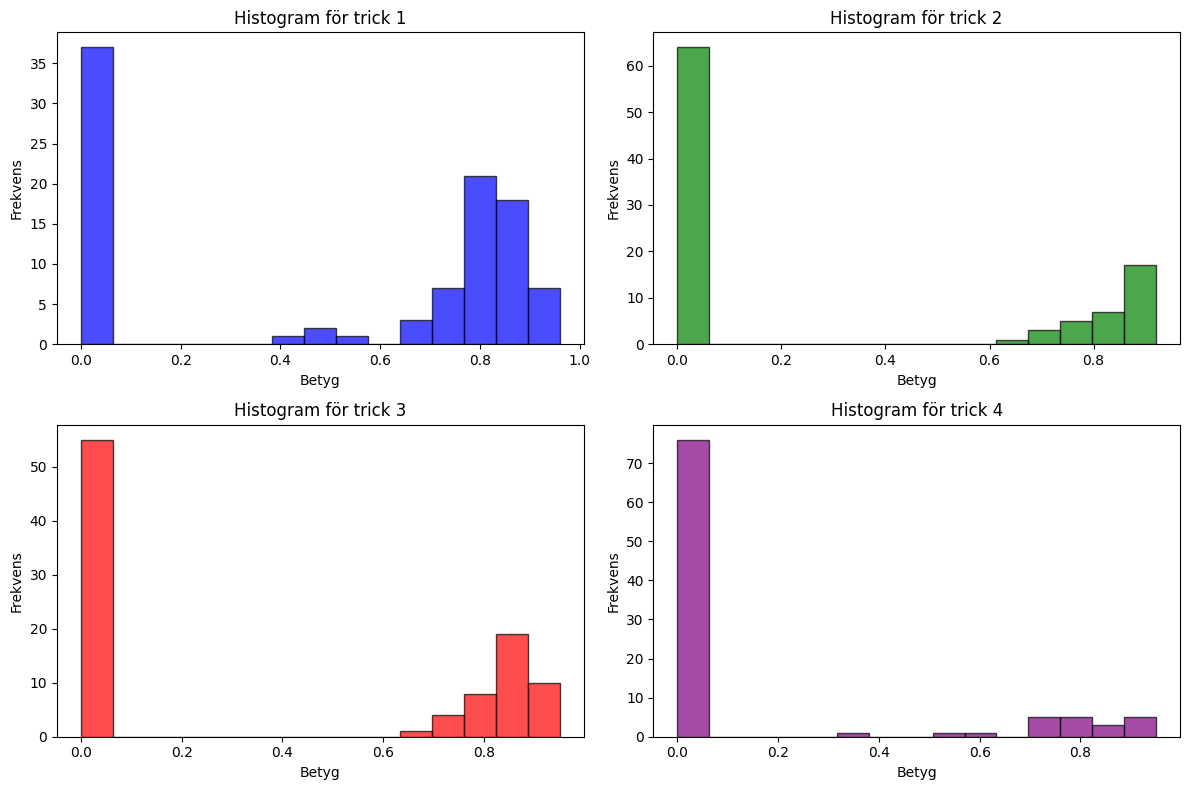

Totalt antal trick: 388
Andel trick med betyg 0: 59.79%


In [2]:
# Rita histogram för varje trick
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
trick_cols = ["trick 1", "trick 2", "trick 3", "trick 4"]
colors = ['blue', 'green', 'red', 'purple']
for i, ax in enumerate(axes.flatten()):
    ax.hist(df[trick_cols[i]].dropna(), bins=15, edgecolor="black", alpha=0.7, color=colors[i])
    ax.set_title(f"Histogram för {trick_cols[i]}")
    ax.set_xlabel("Betyg")
    ax.set_ylabel("Frekvens")
plt.tight_layout()
plt.show()

# Beräkna andelen trick med betyg 0
tricks_grades_array = df[trick_cols].values.flatten()
nr_zeros = np.count_nonzero(tricks_grades_array == 0)
ratio_zeros = nr_zeros / tricks_grades_array.size
print(f"Totalt antal trick: {tricks_grades_array.size}")
print(f"Andel trick med betyg 0: {ratio_zeros:.2%}")


# **Uppgift 1c: Skapa binära landningsvariabler**

**Vad gör vi här?**
- Skapar kolumner som anger om ett trick landades (1) eller misslyckades (0).

In [3]:
# Skapa nya kolumner för landade trick
make_cols = [f"make {i+1}" for i in range(4)]
df[make_cols] = (df[trick_cols] > 0).astype(int)

# Visa exempel på de nya kolumnerna
print("Exempel på binära landningsvariabler:")
print(df[make_cols].head())

Exempel på binära landningsvariabler:
   make 1  make 2  make 3  make 4
0       1       0       1       0
1       1       0       1       1
2       0       0       0       0
3       1       0       1       0
4       1       0       0       0


# **Uppgift 1d: Skatta sannolikhet för högt betyg**

**Vad gör vi här?**
- Beräknar sannolikheten att få ett betyg över 0.6, givet att tricket landats med kvoten $\frac{antal\:trick\:med\:betyg\:över\:0.6}{antal\:landade\:trick}$.
- Beräknar sannolikheten att **inte** landa ett trick.

In [4]:
# Gruppbaserade beräkningar för sannolikheter
tricks_competed = df.groupby("id").size() * 4
made_tricks_sum = df.groupby("id")[make_cols].sum().sum(axis=1)
high_grades = (df[trick_cols] > 0.6).astype(int).groupby(df["id"]).sum().sum(axis=1)

# Sannolikhet att få betyg över 0.6 givet landat trick
prob_high_grade = (high_grades / made_tricks_sum).fillna(0).reset_index()
prob_high_grade.columns = ["id", "probability"]
prob_high_grade.round(2).to_csv('prob_high_grade.csv', index=False)

# Sannolikhet att inte landa ett trick
prob_fail = (1 - (made_tricks_sum / tricks_competed)).fillna(0).reset_index()
prob_fail.columns = ["id", "probability"]
prob_fail.round(2).to_csv('prob_fail.csv', index=False)

# Visa exempel på sannolikhetsskattningar
print("Exempel på sannolikhet att få betyg över 0.6 givet landat trick:")
print(prob_high_grade.head())
print("Exempel på sannolikhet att inte landa ett trick:")
print(prob_fail.head())

Exempel på sannolikhet att få betyg över 0.6 givet landat trick:
        id  probability
0   Berger          1.0
1  Decenzo          1.0
2    Eaton          1.0
3      Foy          1.0
4     Fynn          1.0
Exempel på sannolikhet att inte landa ett trick:
        id  probability
0   Berger     0.833333
1  Decenzo     0.562500
2    Eaton     0.375000
3      Foy     0.500000
4     Fynn     0.500000


# **Uppgift 1e: Scatter plot för run-betyg**

**Vad gör vi här?**
- Skapar ett scatter plot mellan betygen i run 1 och run 2. 

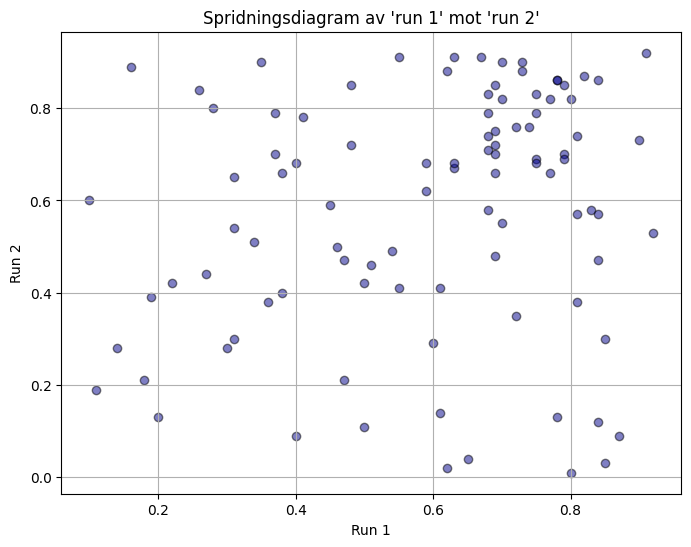

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df["run 1"], df["run 2"], alpha=0.5, color='darkblue', edgecolors='black')
plt.title("Spridningsdiagram av 'run 1' mot 'run 2'")
plt.xlabel("Run 1")
plt.ylabel("Run 2")
plt.grid(True)
plt.show()

# %%
# Spara den normaliserade dataframen som en Parquet-fil
df.to_parquet("df.parquet.gzip", compression="gzip")